# K-Nearest Neighbors and Naive Bayes Classification

This notebook demonstrates a classification task using K-Nearest Neighbors (KNN) and Naive Bayes methods.

In [6]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import cross_val_score
import statsmodels.api as sm


In [3]:
# Load the dataset
dataset = pd.read_csv('artifacts/smoking_driking_dataset_Ver01.csv')
# Display the shape of the dataset
print(f'Number of Rows: {dataset.shape[0]}')
print(f'Number of Columns: {dataset.shape[1]}')
# Display the first few rows of the dataset
dataset.head()

Number of Rows: 991346
Number of Columns: 24


,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
# Display dataset info
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991346 entries, 0 to 991345
Data columns (total 24 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   sex               991346 non-null  object 
 1   age               991346 non-null  int64  
 2   height            991346 non-null  int64  
 3   weight            991346 non-null  int64  
 4   waistline         991346 non-null  float64
 5   sight_left        991346 non-null  float64
 6   sight_right       991346 non-null  float64
 7   hear_left         991346 non-null  float64
 8   hear_right        991346 non-null  float64
 9   SBP               991346 non-null  float64
 10  DBP               991346 non-null  float64
 11  BLDS              991346 non-null  float64
 12  tot_chole         991346 non-null  float64
 13  HDL_chole         991346 non-null  float64
 14  LDL_chole         991346 non-null  float64
 15  triglyceride      991346 non-null  float64
 16  hemoglobin        99

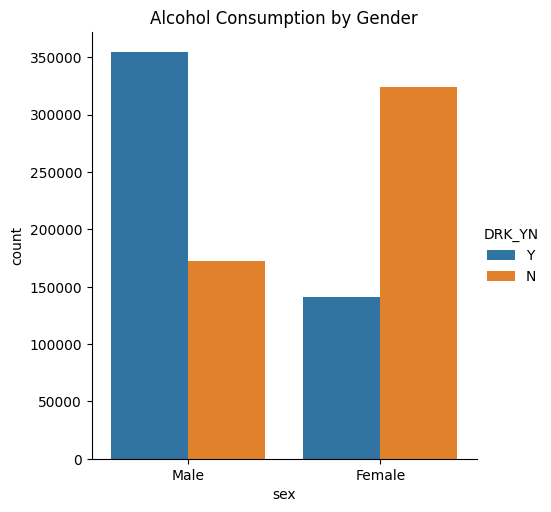

In [7]:
# Bar plot for alcohol consumption by gender
sns.catplot(x="sex", hue="DRK_YN", kind="count", data=dataset)
plt.title("Alcohol Consumption by Gender")
plt.show()

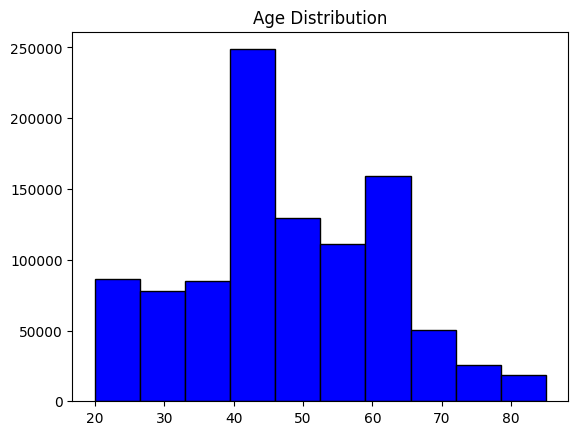

In [8]:
# Histogram for age distribution
plt.hist(dataset['age'], bins=10, color="blue", edgecolor="black")
plt.title("Age Distribution")
plt.show()

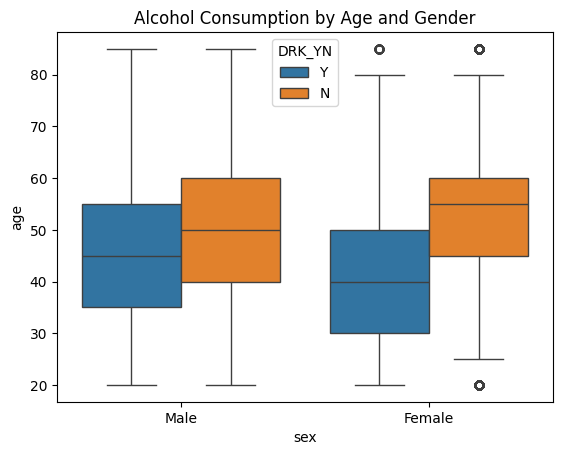

In [9]:
# Box plot for alcohol consumption by age and gender
sns.boxplot(x="sex", y="age", hue="DRK_YN", data=dataset)
plt.title("Alcohol Consumption by Age and Gender")
plt.show()

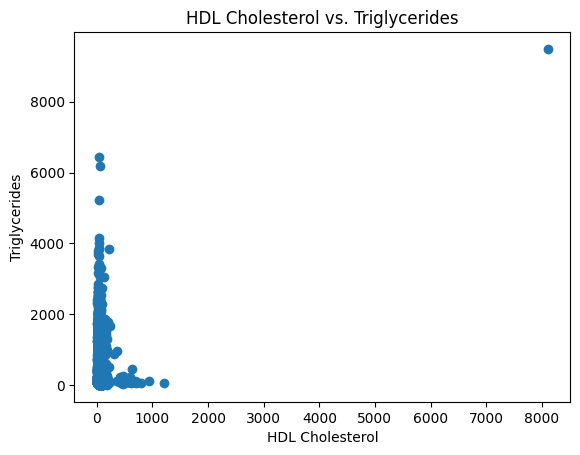

In [10]:
# Scatter Plot of HDL Cholesterol vs. Triglycerides
plt.scatter(dataset['HDL_chole'], dataset['triglyceride'])
plt.title("HDL Cholesterol vs. Triglycerides")
plt.xlabel("HDL Cholesterol")
plt.ylabel("Triglycerides")
plt.show()

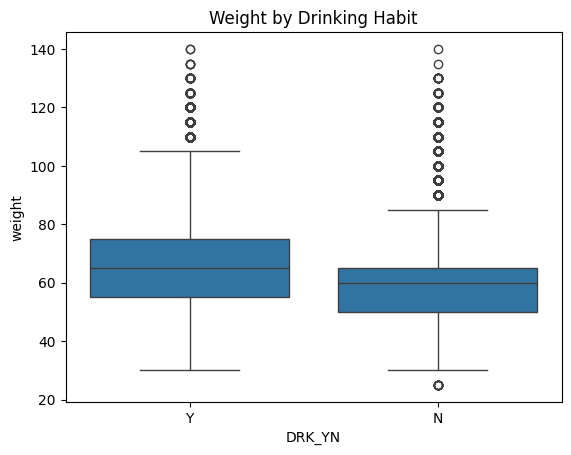

In [11]:
# Box plot of weight by drinking habit
sns.boxplot(x="DRK_YN", y="weight", data=dataset)
plt.title("Weight by Drinking Habit")
plt.show()

In [12]:
# Data preprocessing: Encode categorical variables
label_encoder = LabelEncoder()
dataset['sex'] = label_encoder.fit_transform(dataset['sex'])  # Male = 0, Female = 1
dataset['DRK_YN'] = label_encoder.fit_transform(dataset['DRK_YN'])  # Y = 1, N = 0

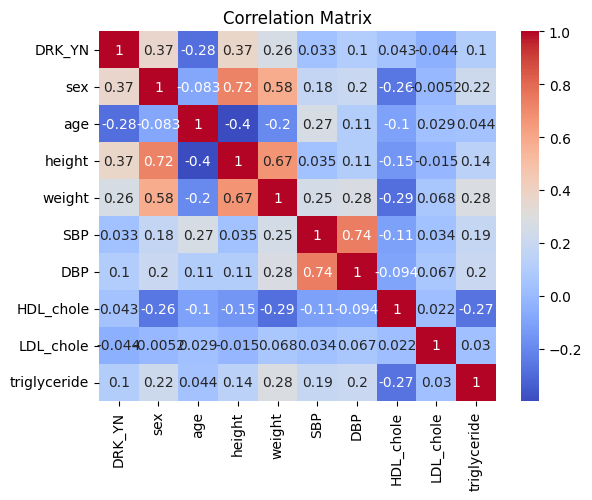

In [13]:
# Correlation matrix
correlation_matrix = dataset[['DRK_YN', 'sex', 'age', 'height', 'weight', 'SBP', 'DBP', 'HDL_chole', 'LDL_chole', 'triglyceride']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [14]:
# Set seed for reproducibility
np.random.seed(123)
sample_data = dataset.sample(n=10000)

# Split the data into training and test sets
X = sample_data.drop('DRK_YN', axis=1)
y = sample_data['DRK_YN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)

In [15]:
# Logistic Regression model
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(X_train, y_train)
logistic_predictions = logistic_model.predict(X_test)

# Evaluate logistic regression
logistic_accuracy = accuracy_score(y_test, logistic_predictions)
print("Logistic Regression Accuracy:", logistic_accuracy)

# Confusion matrix for logistic regression
logistic_confusion_matrix = confusion_matrix(y_test, logistic_predictions)
print("Confusion Matrix for Logistic Regression:")
print(logistic_confusion_matrix)

Logistic Regression Accuracy: 0.7196666666666667
Confusion Matrix for Logistic Regression:
[[1044  420]
 [ 421 1115]]


/Users/shashankrallapalli/Documents/gitrepo/KNN-NaiveBayes/venv/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# Logistic Regression with Hyperparameter Tuning (using cross-validation and GridSearchCV)
param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2']
}

logistic_cv_model = GridSearchCV(LogisticRegression(solver='liblinear', max_iter=1000), param_grid, cv=10)
logistic_cv_model.fit(X_train, y_train)

# Best hyperparameters
best_C = logistic_cv_model.best_params_['C']
best_penalty = logistic_cv_model.best_params_['penalty']

# Final logistic model with best parameters
final_logistic_model = LogisticRegression(C=best_C, penalty=best_penalty, solver='liblinear', max_iter=1000)
final_logistic_model.fit(X_train, y_train)
final_logistic_predictions = final_logistic_model.predict(X_test)

# Evaluate final logistic model
final_logistic_accuracy = accuracy_score(y_test, final_logistic_predictions)
print("Tuned Logistic Regression Accuracy:", final_logistic_accuracy)

Tuned Logistic Regression Accuracy: 0.721


In [ ]:
# Confusion matrix for tuned logistic regression
final_logistic_confusion_matrix = confusion_matrix(y_test, final_logistic_predictions)
print("Confusion Matrix for tuned Logistic Regression:")
print(final_logistic_confusion_matrix)

In [16]:
# K-Nearest Neighbors (KNN) model with different K values
k_values = [1, 3, 5, 20, 50]
knn_accuracies = []

for k in k_values:
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train, y_train)
    knn_predictions = knn_model.predict(X_test)
    knn_accuracy = accuracy_score(y_test, knn_predictions)
    knn_accuracies.append(knn_accuracy)
    print(f"KNN (k={k}) Accuracy:", knn_accuracy)

KNN (k=1) Accuracy: 0.6016666666666667
KNN (k=3) Accuracy: 0.6406666666666667
KNN (k=5) Accuracy: 0.6496666666666666
KNN (k=20) Accuracy: 0.6703333333333333
KNN (k=50) Accuracy: 0.6826666666666666


In [17]:
#Random Forest
rf_model = RandomForestClassifier(random_state=123)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

# Evaluate Random Forest
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

# Confusion matrix for Random Forest
rf_confusion_matrix = confusion_matrix(y_test, rf_predictions)
print("Confusion Matrix for Random Forest:")
print(rf_confusion_matrix)

Random Forest Accuracy: 0.7246666666666667
Confusion Matrix for Random Forest:
[[1029  435]
 [ 391 1145]]


In [18]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)

# Evaluate Naive Bayes
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

# Confusion matrix for Naive Bayes
nb_confusion_matrix = confusion_matrix(y_test, nb_predictions)
print("Confusion Matrix for Naive Bayes:")
print(nb_confusion_matrix)

Naive Bayes Accuracy: 0.6856666666666666
Confusion Matrix for Naive Bayes:
[[ 902  562]
 [ 381 1155]]


In [20]:
# Comparison table for model accuracies
comparison_table = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN (k=1)', 'KNN (k=3)', 'KNN (k=5)', 'KNN (k=20)', 'KNN (k=50)', 'Random Forest', 'Naive Bayes', 'Tuned Logistic Regression'],
    'Accuracy': [logistic_accuracy] + knn_accuracies + [rf_accuracy, nb_accuracy, final_logistic_accuracy]
})

print("Comparison of Model Accuracies:")
print(comparison_table)

Comparison of Model Accuracies:
                       Model  Accuracy
0        Logistic Regression  0.719667
1                  KNN (k=1)  0.601667
2                  KNN (k=3)  0.640667
3                  KNN (k=5)  0.649667
4                 KNN (k=20)  0.670333
5                 KNN (k=50)  0.682667
6              Random Forest  0.724667
7                Naive Bayes  0.685667
8  Tuned Logistic Regression  0.721000
